In [1]:
import matplotlib.pyplot as plt
from deepface import DeepFace
import cv2

In [87]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def emotion_recognition(image_path):
    """
        This function predicts a human's emotion based on an image passed to it and displays the result using Matplotlib.
    """
    image = cv2.imread(image_path)

    gray_frame = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=10, minSize=(30,30))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    for i, (x,y,w,h) in enumerate(faces):
        face_img = image[y:y+h, x:x+w]

        try:
            result = DeepFace.analyze(face_img, actions=["emotion"])[0]["dominant_emotion"]
        except:
            pass
        else:
            print(result)

            cv2.rectangle(image, [x,y], [x+w,y+h], (0,0,255), 2)
            cv2.putText(image, f"{result}", (x, y-10), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), 2)

    plt.imshow(image)

    plt.axis(False)
        

happy


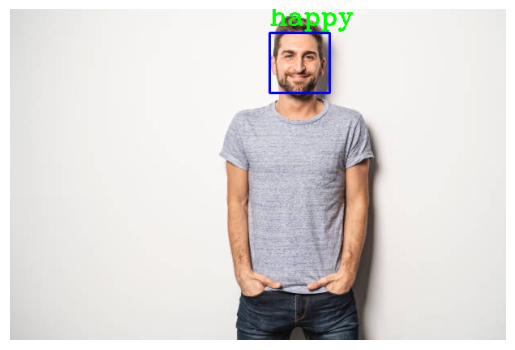

In [88]:
emotion_recognition("adult2.jpeg")

angry


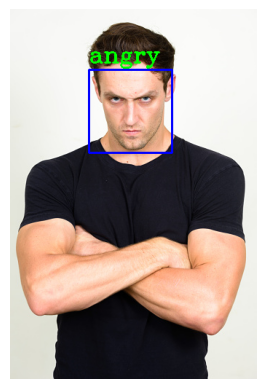

In [64]:
emotion_recognition("adult5.jpeg")

neutral


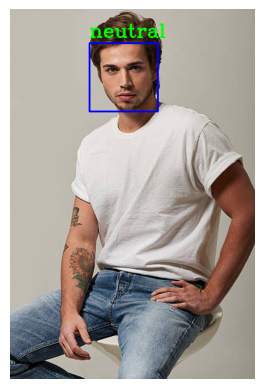

In [65]:
emotion_recognition("adult3.jpeg")

surprise


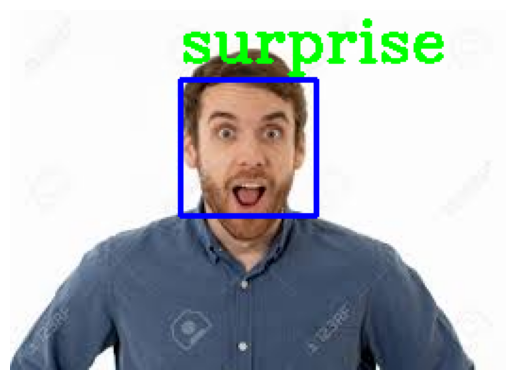

In [66]:
emotion_recognition("surprised_man4.jpeg")

## Testing the Model on Live Camera

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

camera = cv2.VideoCapture(0)

while camera.isOpened():
    success, frame = camera.read()

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=10, minSize=(30,30))

    for i, (x,y,w,h) in enumerate(faces): 
        face = frame[y:y+h, x:x+w]
        try:
            result = DeepFace.analyze(face, actions=["emotion"])[0]["dominant_emotion"]
        except:
            pass
        else:
            print(result)
            cv2.putText(frame, f"{result}", (x-40, y-40), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), 2)

            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)

    cv2.imshow("camera", frame)

    if cv2.waitKey(1) == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


angry
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
fear
sad
fear
neutral
fear
neutral
fear
fear
fear
fear
fear
fear
sad
fear
fear
fear
fear
fear
fear
fear
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
angry
sad
sad
sad
angry
angry
fear
angry
fear
angry
fear
angry
angry
fear
sad
sad
angry
angry
angry
angry
angry
sad
angry
sad
sad
sad
sad
angry
fear
sad
sad
sad
sad
sad
sad
sad
sad
neutral
sad
sad
sad
sad
sad
neutral
sad
sad
sad
happy
fear
sad
sad
neutral
sad
neutral
sad
happy
sad
sad
fear
sad
fear
sad
fear
happy
sad
sad
fear
sad
sad
sad
sad
happy
fear
sad
sad
happy
fear
sad
sad
happy
sad
happy
sad
sad
sad
sad
fear
sad
sad
happy
fear
happy
sad
sad
sad
sad
sad
sad
sad
sad
sad
neutral
fear
sad
fear
sad
sad
neutral
fear
sad
fear
sad
sad
neutral
sad
neutral
fear
neutral
fear
neutral
fear
angry
fear
sad
fear
neutral
fear
neutral
sad
sad
sad
neutral
fear
neutral
fear
sad
fear
neutral
fear
neutral
fear
sad
fear
neutral
fear
neutral
fear
sad
fear
neutral
fear
neutral
sad


-1